In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
import matplotlib.pyplot as plt



In [30]:
n = 20
x = np.zeros((n,))
y = np.zeros((n,))
#for i in range(n):
   #x[i] = np.random.random() * 6 - 3# от -1 до 1
x=np.random.random(size=(n, )) * 6 - 3
x = np.sort(x, axis = 0)

In [31]:
y = 3 - 3.5*x - 4.2*x**2 + 3.67*x**3 - 2.11*x**4 + 1.8*x**5 + np.random.normal(0,50,n)#ошибка из норм распредления, 50 - std

[-561.44899024 -219.4566908  -292.54130157 -201.50454433 -226.40658401
 -157.8081176  -159.62026114  -91.93041429  -14.78495047  102.9441514
   17.4641984    18.82644767  -50.74870282   72.31424729   98.22328193
  -76.12221049   73.13481926  272.06761267  106.45870567  265.51076428]


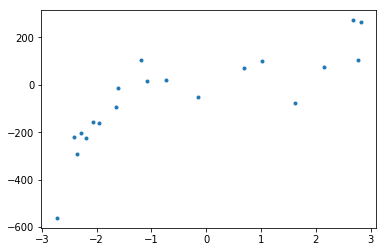

In [32]:
x = x.reshape(-1,1)
plt.plot(x,y,'o', markersize=3)
#plt.show()

In [33]:
deg = 2
pol = PolynomialFeatures(degree=deg)
x_pol = pol.fit_transform(X = x)
model = LinearRegression()#fit_intercept - учитывать b0 или нет
model.fit(x_pol,y)#обучить модель


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

[  0.          84.28779313 -20.67551455] 64.89636323693438


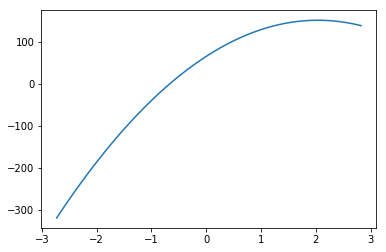

In [38]:
regression_x = np.linspace(x.min(), x.max(), 1001)#1000 равномерных интервалов
regression_x = regression_x.reshape(-1,1)
regression_x_pol = pol.transform(X = regression_x)
regression_y = model.predict(regression_x_pol)

plt.plot(regression_x,regression_y)
print(model.coef_,model.intercept_)
plt.show()

?????????????????????????????????????????????????????/
где точки лул?

[-3.42739539e-103  5.52753135e-106  6.79526284e-110  5.94830118e-118
 -5.03436949e-120 -1.05286093e-120  0.00000000e+000  2.42285075e-122
  8.26934227e-126 -3.63135488e-122  3.58175956e-122  3.68866775e-123
  9.74045600e-124  8.24405630e-124  6.96877973e-124  5.88561850e-124
  4.96778230e-124  4.19129562e-124  1.01613474e-123  8.56881492e-124
  2.51348132e-124  2.11904695e-124  1.78637093e-124  1.50589827e-124
  1.26942037e-124  1.07132984e-124  9.00198380e-125  7.50165316e-125
  6.37640519e-125  4.50099190e-125  6.00132253e-125 -8.46127795e-134
 -1.24972029e-133 -1.84582147e-133 -2.72625573e-133 -4.02664826e-133
 -5.94730378e-133 -8.78410838e-133 -1.29739938e-132 -1.91625357e-132
 -2.83026390e-132 -4.18020930e-132 -6.17423675e-132 -9.11833388e-132
 -1.34731848e-131 -1.98945467e-131 -2.93903788e-131 -4.34628907e-131
 -6.40112487e-131 -9.46469825e-131 -1.39479764e-130 -2.07227078e-130
 -3.18810889e-130 -4.46335244e-130 -7.65146132e-130 -1.02019484e-129
 -2.04038969e-129 -2.04038969e-129

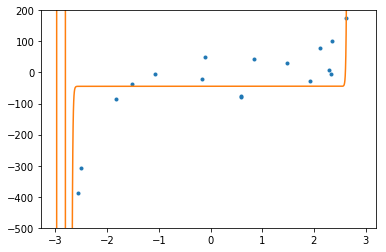

In [51]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet#У всех методов есть вариант с CrossValidation - LassoCV
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

n = 20
x = np.zeros((n, ))
y = np.zeros((n, ))

x = np.random.random(size = (n, )) * 6 - 3
x = np.sort(x, axis=0)

y = 3 - 3.5*x - 4.2*x**2 + 3.67*x**3 - 2.11*x**4 + 1.8*x**5 + np.random.normal(0, 50, n) 
x = x.reshape(-1, 1)

plt.plot(x, y, 'o', markersize=3)


deg = 250
pol = PolynomialFeatures(degree=deg)
x_pol = pol.fit_transform(X=x)

model = LinearRegression()
#model = Ridge(alpha=1)
#model = Lasso(alpha = 0.1)
model.fit(x_pol, y)

regression_x = np.linspace(x.min(), x.max(), 1001)
regression_x = regression_x.reshape(-1, 1)
regression_x_pol = pol.transform(X=regression_x)
regression_y = model.predict(regression_x_pol)

plt.plot(regression_x, regression_y)
plt.ylim(-500,200)
print(model.coef_, model.intercept_)
plt.show()

регрессионная кривая очень далека от реальной кривой в точках, не совпадающих с данными

Слишком подогнали модель. Надо 5, а взяли 25. На новых данных предсказание будет отстой

Не находит паттерны в данных, а подлаживает себя под данные